In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


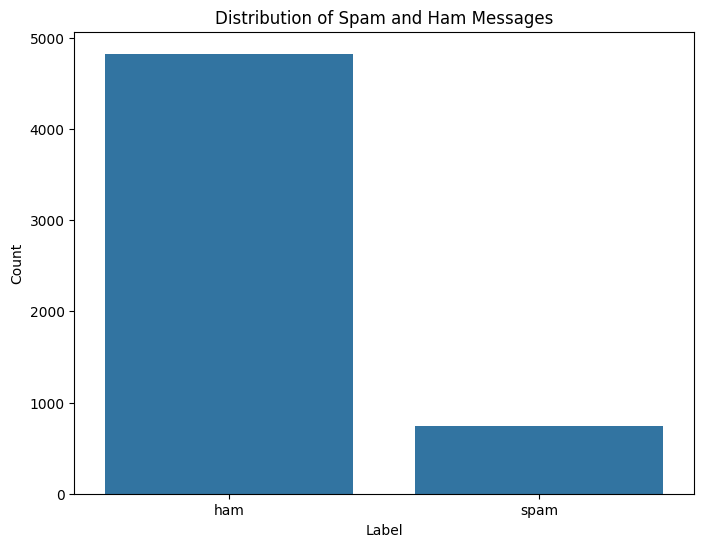

In [7]:
# Load and preview the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding='latin-1')
print(df.head())

# Remove unnecessary columns
columns_to_remove = df.columns[2:5]
df.drop(columns=columns_to_remove, inplace=True)

# Visualize the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [8]:
# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['v1'])
df.drop('v1', axis=1, inplace=True)

# Prepare features and target
X = df['v2']
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)
print(X_train_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34794 stored elements and shape (4457, 7472)>
  Coords	Values
  (0, 1371)	0.4658046386365619
  (0, 4416)	0.4528381701109944
  (0, 1706)	0.3431839629173582
  (0, 7415)	0.348722265231364
  (0, 3210)	0.348722265231364
  (0, 4520)	0.4658046386365619
  (1, 1187)	0.26161139982801973
  (1, 3140)	0.3059746053542906
  (1, 3631)	0.2804339696184593
  (1, 6296)	0.269833648032668
  (1, 1533)	0.2015782058421696
  (1, 2661)	0.3059746053542906
  (1, 5005)	0.1937920260229529
  (1, 4292)	0.2953742837684993
  (1, 419)	0.28715203556385105
  (1, 4533)	0.3059746053542906
  (1, 6440)	0.2953742837684993
  (1, 1649)	0.3059746053542906
  (1, 0)	0.2654936554684193
  (2, 3061)	0.44585171875646595
  (2, 5770)	0.3962151014046925
  (2, 1674)	0.35156722029872034
  (2, 5351)	0.5102109014477275
  (2, 2190)	0.5102109014477275
  (3, 5048)	0.4444794309161828
  :	:
  (4451, 5002)	0.36484607066812064
  (4451, 4939)	0.36484607066812064
  (4452, 3085)	0.25923599228

In [9]:
# Initialize classifiers
lr_model = LogisticRegression()
svc_model = SVC()
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 128), random_state=42)

# Train models
lr_model.fit(X_train_vec, y_train)
svc_model.fit(X_train_vec, y_train)
mlp_model.fit(X_train_vec, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_vec)
svc_pred = svc_model.predict(X_test_vec)
mlp_pred = mlp_model.predict(X_test_vec)


In [10]:
# Output results
print(f"Logistic Regression Accuracy: {lr_model.score(X_test_vec, y_test)}")
print(f"SVM Accuracy: {svc_model.score(X_test_vec, y_test)}")
print(f"Neural Network Accuracy: {mlp_model.score(X_test_vec, y_test)}")

print(f"Logistic Regression F1 Score: {f1_score(y_test, lr_pred)}")
print(f"SVM F1 Score: {f1_score(y_test, svc_pred)}")
print(f"Neural Network F1 Score: {f1_score(y_test, mlp_pred)}")


Logistic Regression Accuracy: 0.9524663677130045
SVM Accuracy: 0.9766816143497757
Neural Network Accuracy: 0.9829596412556054
Logistic Regression F1 Score: 0.7905138339920948
SVM F1 Score: 0.9057971014492754
Neural Network F1 Score: 0.9342560553633218
